# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [98]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [99]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

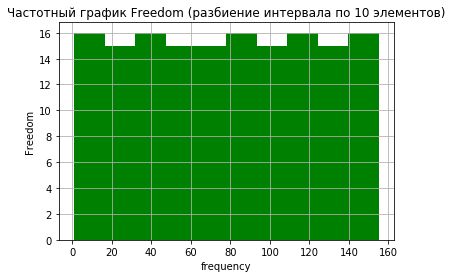

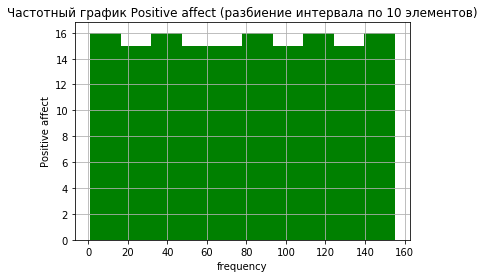

In [100]:
n, bins, patches = plt.hist(df['Freedom'],10, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df['Positive affect'],10, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Ответ: Равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [101]:
# Извлекаем duration 
freedom = df['Freedom']

# Находим их количество
num_freedom = len(freedom)

# Сортируем в порядке возрастания
sorted_freedom = sorted(freedom)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  71.0


In [102]:
import statistics
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [103]:
freedom[28] = 0
len(freedom)

C:\Users\Alexandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


156

In [104]:
statistics.mode(freedom)

StatisticsError: no unique mode; found 156 equally common values

In [105]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [106]:
statistics.pstdev(freedom)

45.032395746469746

In [107]:
statistics.pvariance(freedom)

2027.9166666666667

In [108]:
min(freedom)

0.0

In [109]:
max(freedom)

155.0

In [110]:
duration_range = max(freedom) - min(freedom)
print(duration_range)

155.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

C:\Users\Alexandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


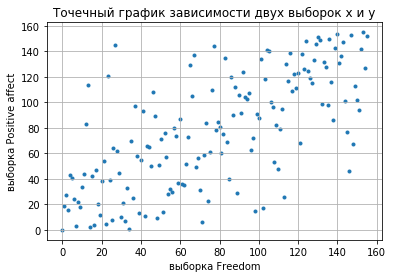

In [112]:
df['Positive affect'][28] = 0
freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.') 

In [113]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6878506740844937


Знак коэффициента Пирсона говорит о обратной зависимости (-) и про прямую зависимомть (+), 0-нет зависимости

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [114]:
print(statistics.mean(freedom))

77.5


In [116]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [117]:
min(freedom_1)

-77.5

In [118]:
max(freedom_1)

77.5

In [119]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

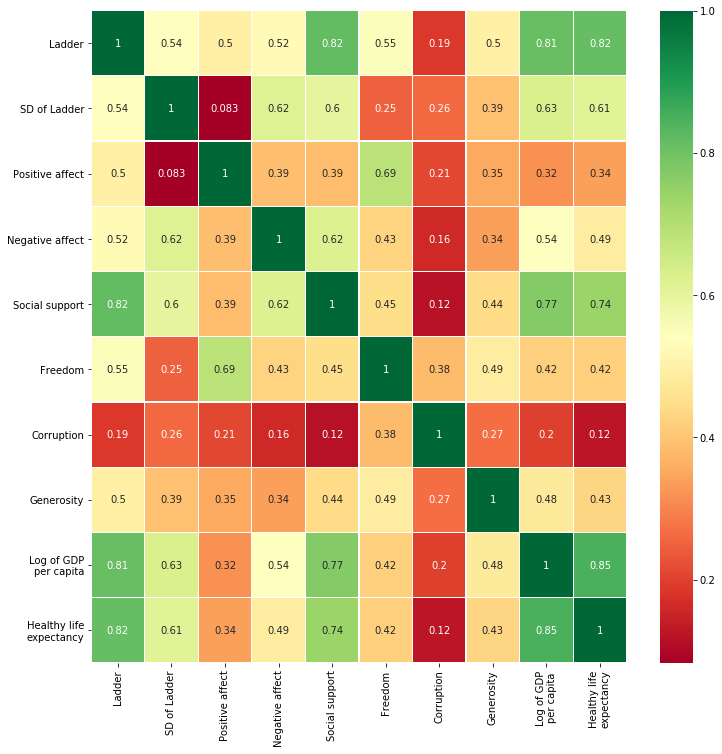

In [120]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


Загрузить следующую таблицу: 

In [121]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

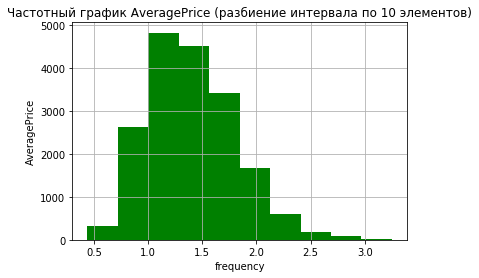

In [124]:
average_price = df['AveragePrice']
n, bins, patches = plt.hist(df['AveragePrice'],10, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

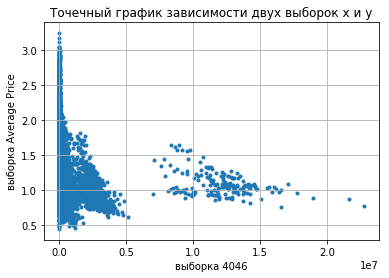

In [126]:
PLU = df['4046']
average_price = df['AveragePrice']
plt.xlabel('выборка 4046')
plt.ylabel('выборка Average Price')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(PLU, average_price, marker='.') 

In [127]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(PLU, average_price)
print(corr)

-0.20831704848788477


Корреляция слабая (обратная зависимость)